Reading The Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('/content/credit (1).csv')

Understanding The Data

In [3]:
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [4]:
data.columns


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [5]:

# Summary statistics
print(data.describe())



                  ID    Customer_ID          Month            Age  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    80631.500000   25982.666640       4.500000      33.316340   
std     43301.486619   14340.543051       2.291299      10.764812   
min      5634.000000    1006.000000       1.000000      14.000000   
25%     43132.750000   13664.500000       2.750000      24.000000   
50%     80631.500000   25777.000000       4.500000      33.000000   
75%    118130.250000   38385.000000       6.250000      42.000000   
max    155629.000000   50999.000000       8.000000      56.000000   

                SSN  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  1.000000e+05  100000.000000          100000.000000      100000.000000   
mean   5.004617e+08   50505.123449            4197.270835           5.368820   
std    2.908267e+08   38299.422093            3186.432497           2.593314   
min    8.134900e+04    7005.930000             303.645417 

EDA and Preprocessing

<ipython-input-6-f79325bdfc3a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


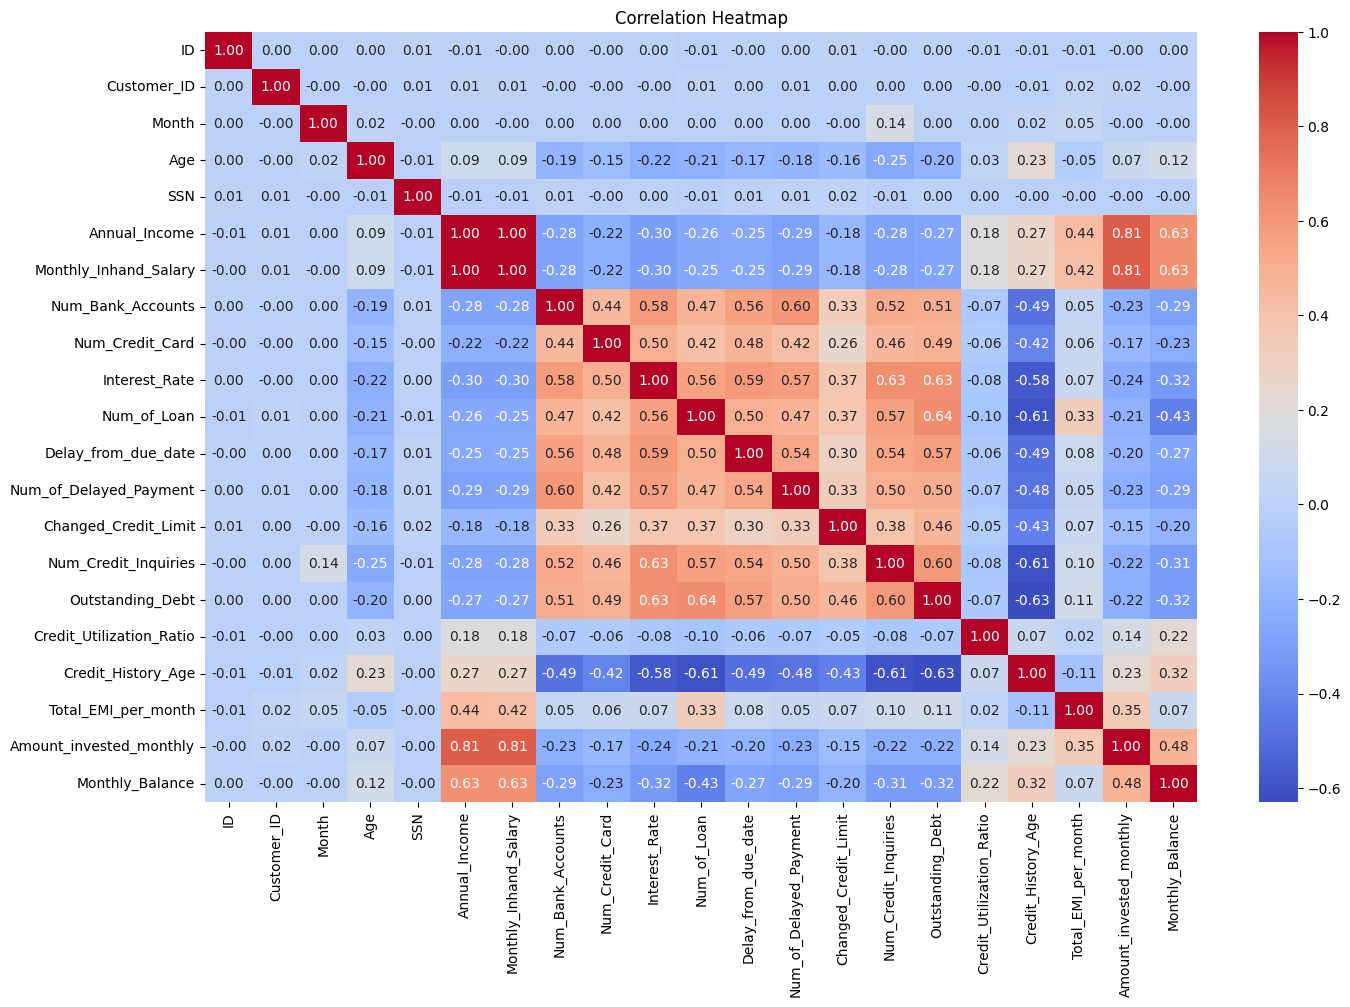

In [6]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

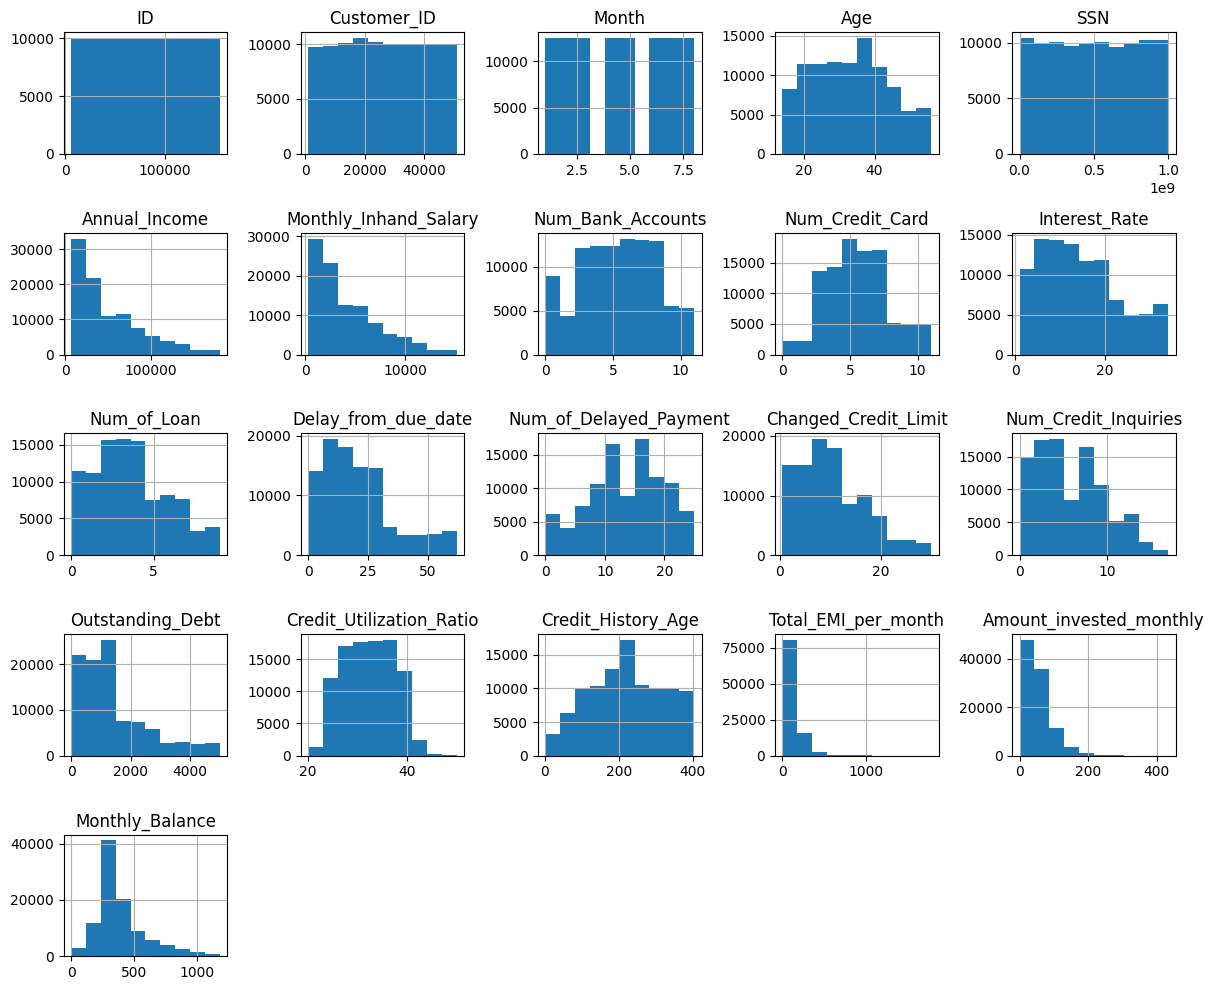

In [7]:
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


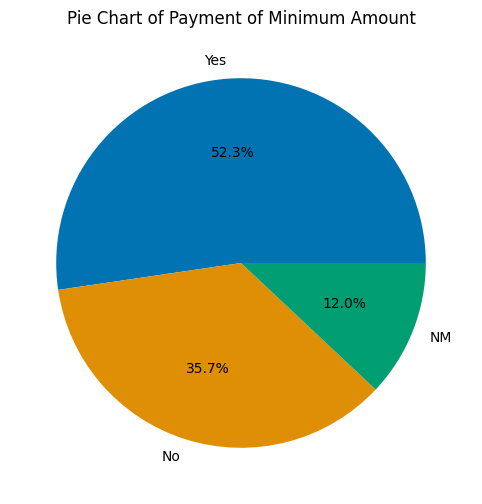

In [8]:
palette = 'colorblind'
plt.figure(figsize=(8, 6))
data['Payment_of_Min_Amount'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette(palette))
plt.title('Pie Chart of Payment of Minimum Amount')
plt.ylabel('')
plt.show()

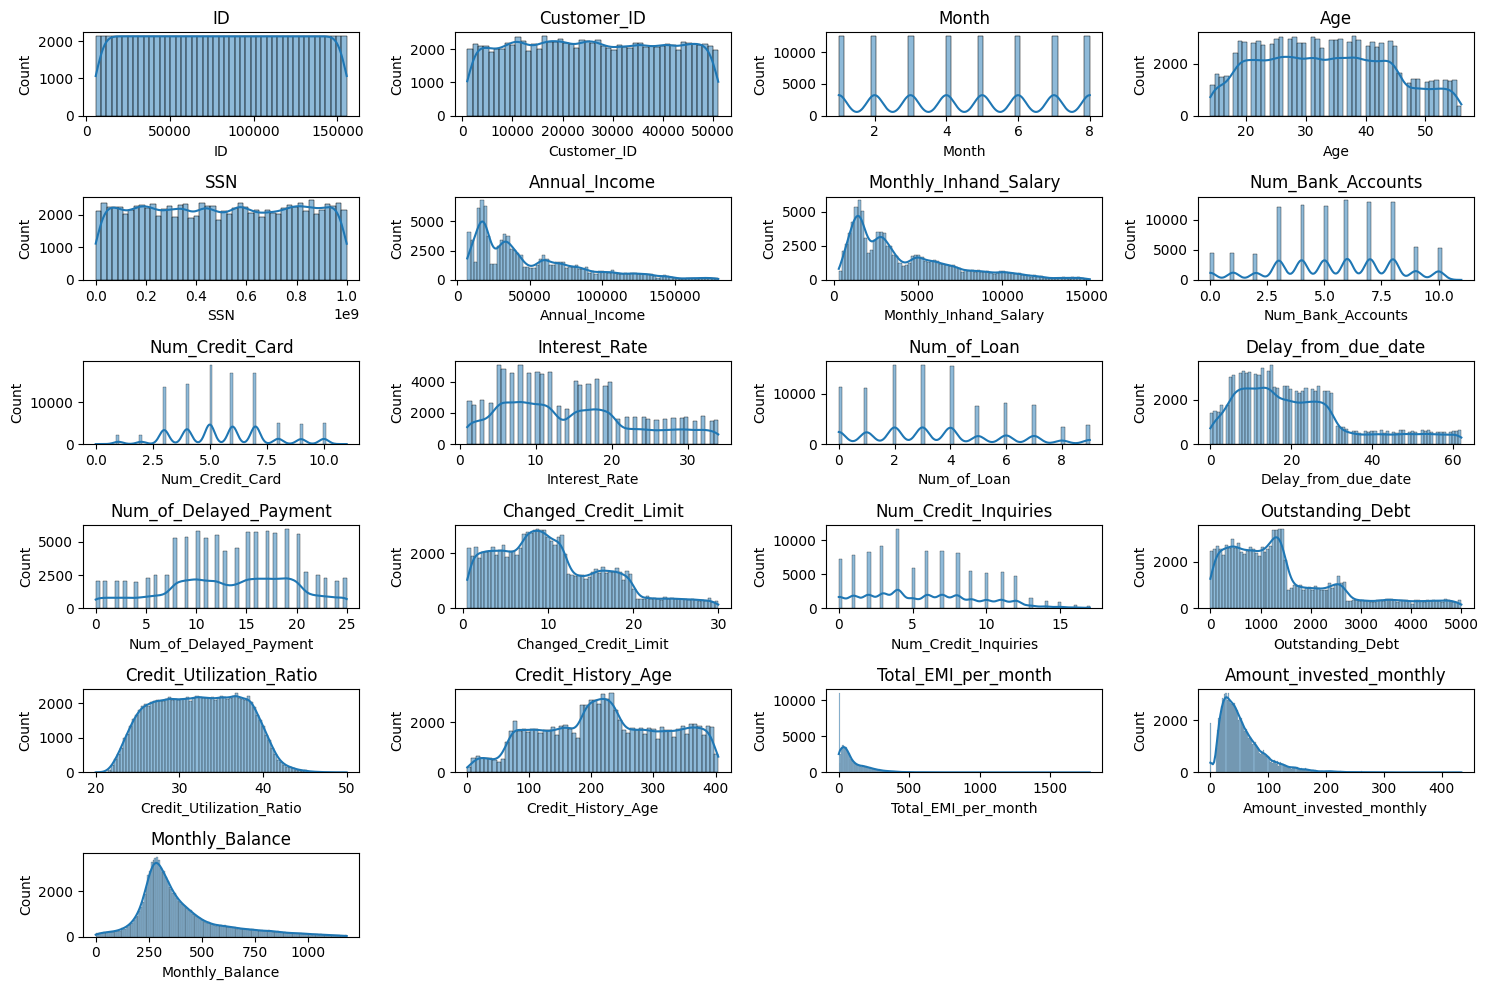

In [9]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(6,4, i)  # Change the number of rows to 4
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

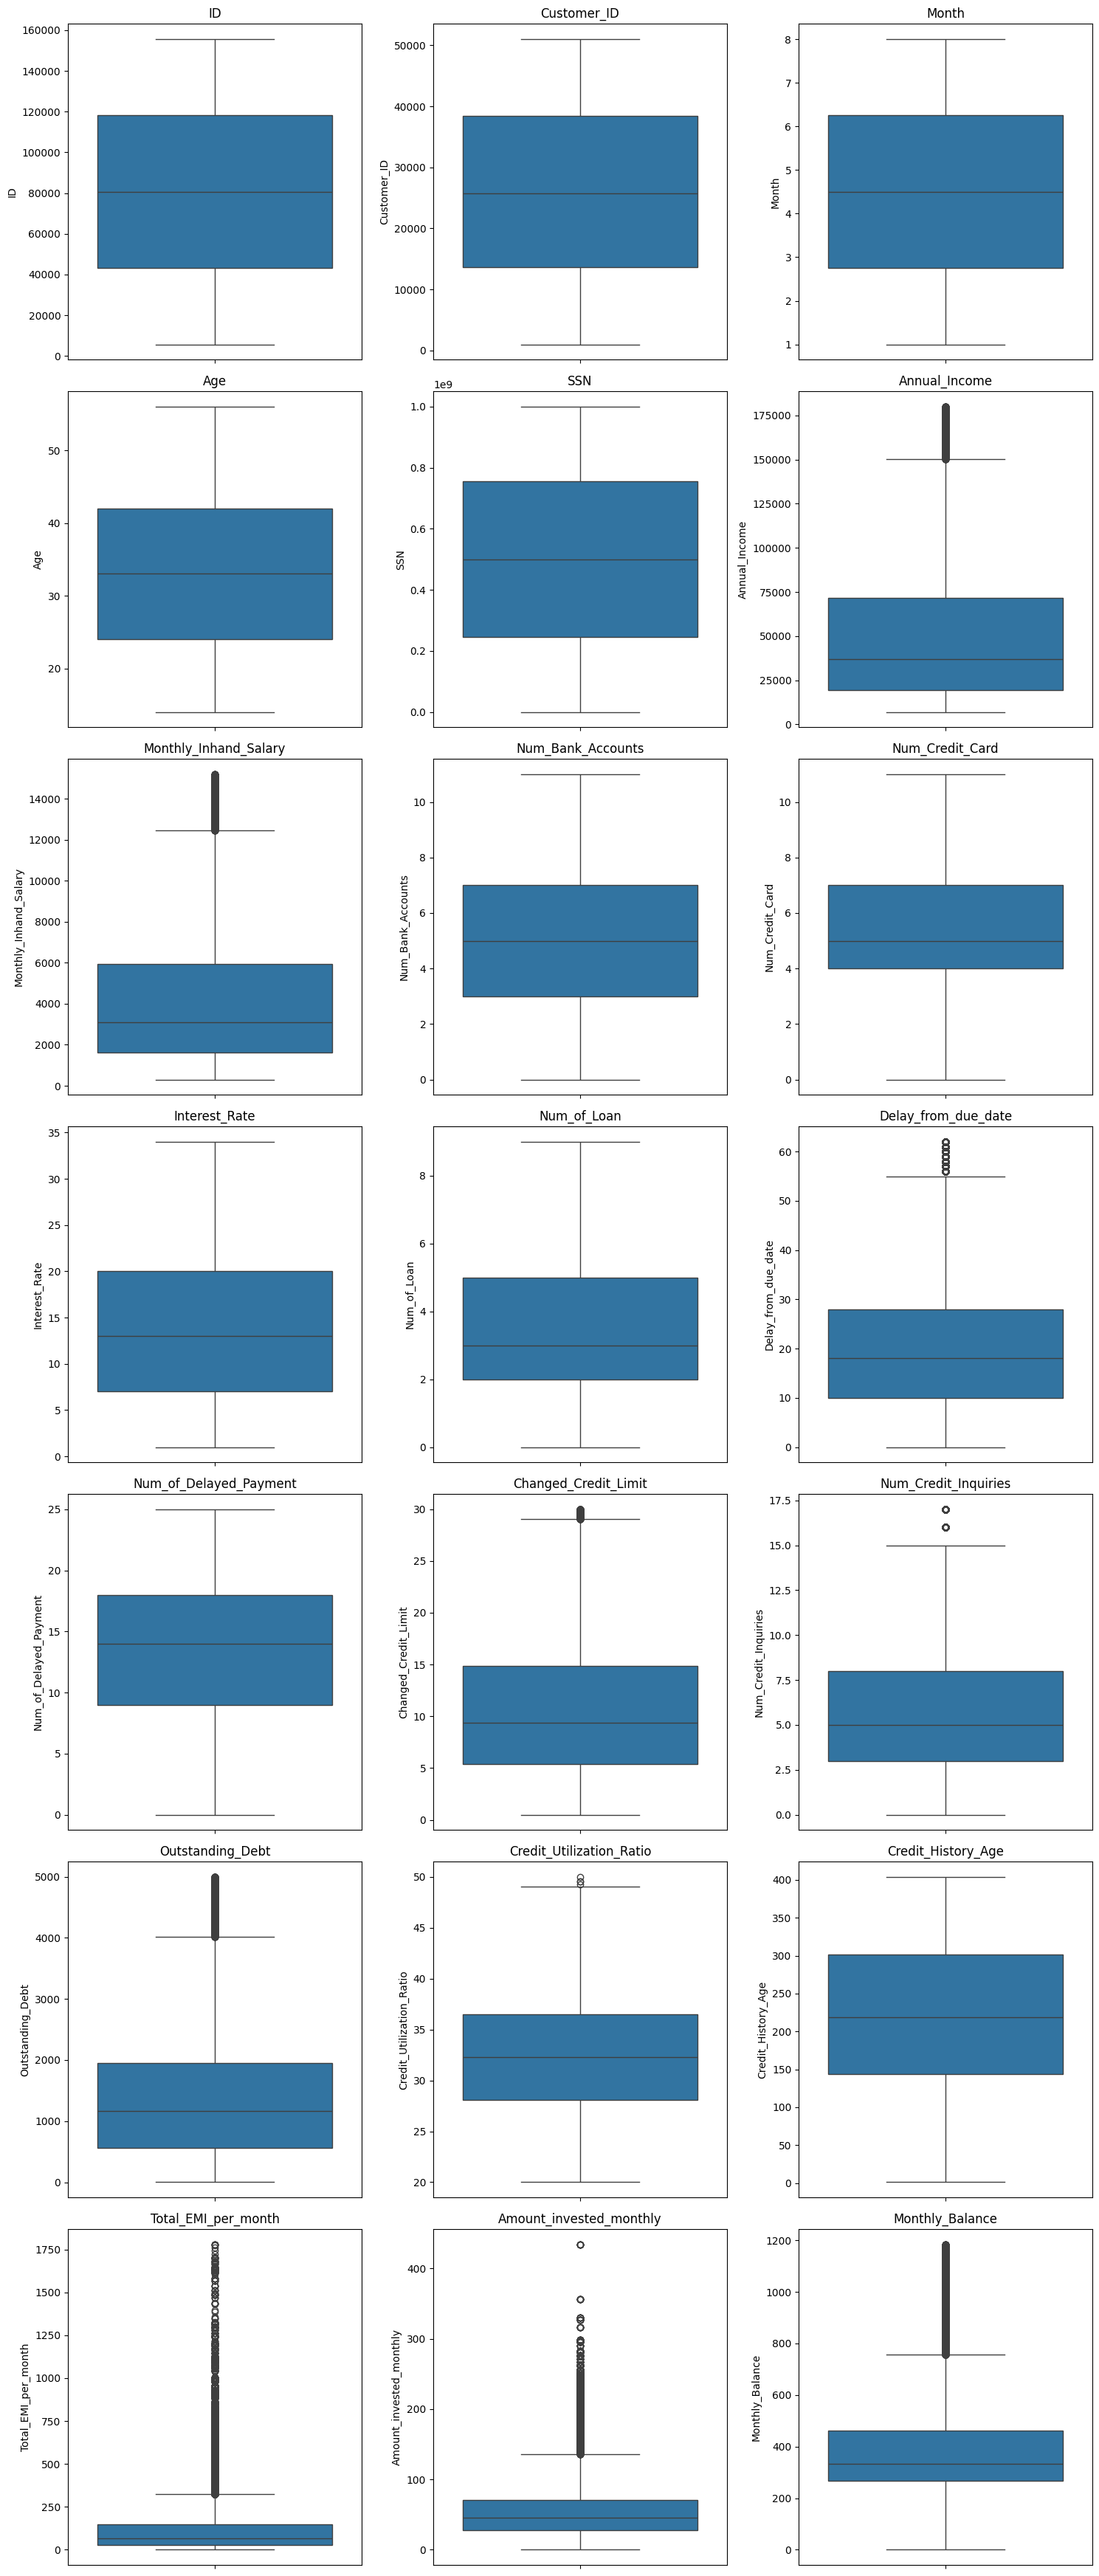

In [10]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for each numerical variable
num_plots = len(numerical_columns)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calculate number of rows needed
plt.figure(figsize=(15, num_rows * 5))  # Adjust figure size based on number of rows
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Adjust the number of columns to 3
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [11]:


#  function to detect outliers using IQR method
def detect_outliers(data):
    outliers = []
    for column in data.columns:
        if data[column].dtype in ['int64', 'float64']:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outlier_indices = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index
            outliers.extend(outlier_indices)
    return list(set(outliers))

#  outliers
outliers_indices = detect_outliers(data)

# Removing outliers
clean_data = data.drop(outliers_indices)


print(f"Number of outliers removed: {len(outliers_indices)}")




Number of outliers removed: 23258


In [12]:
clean_data


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


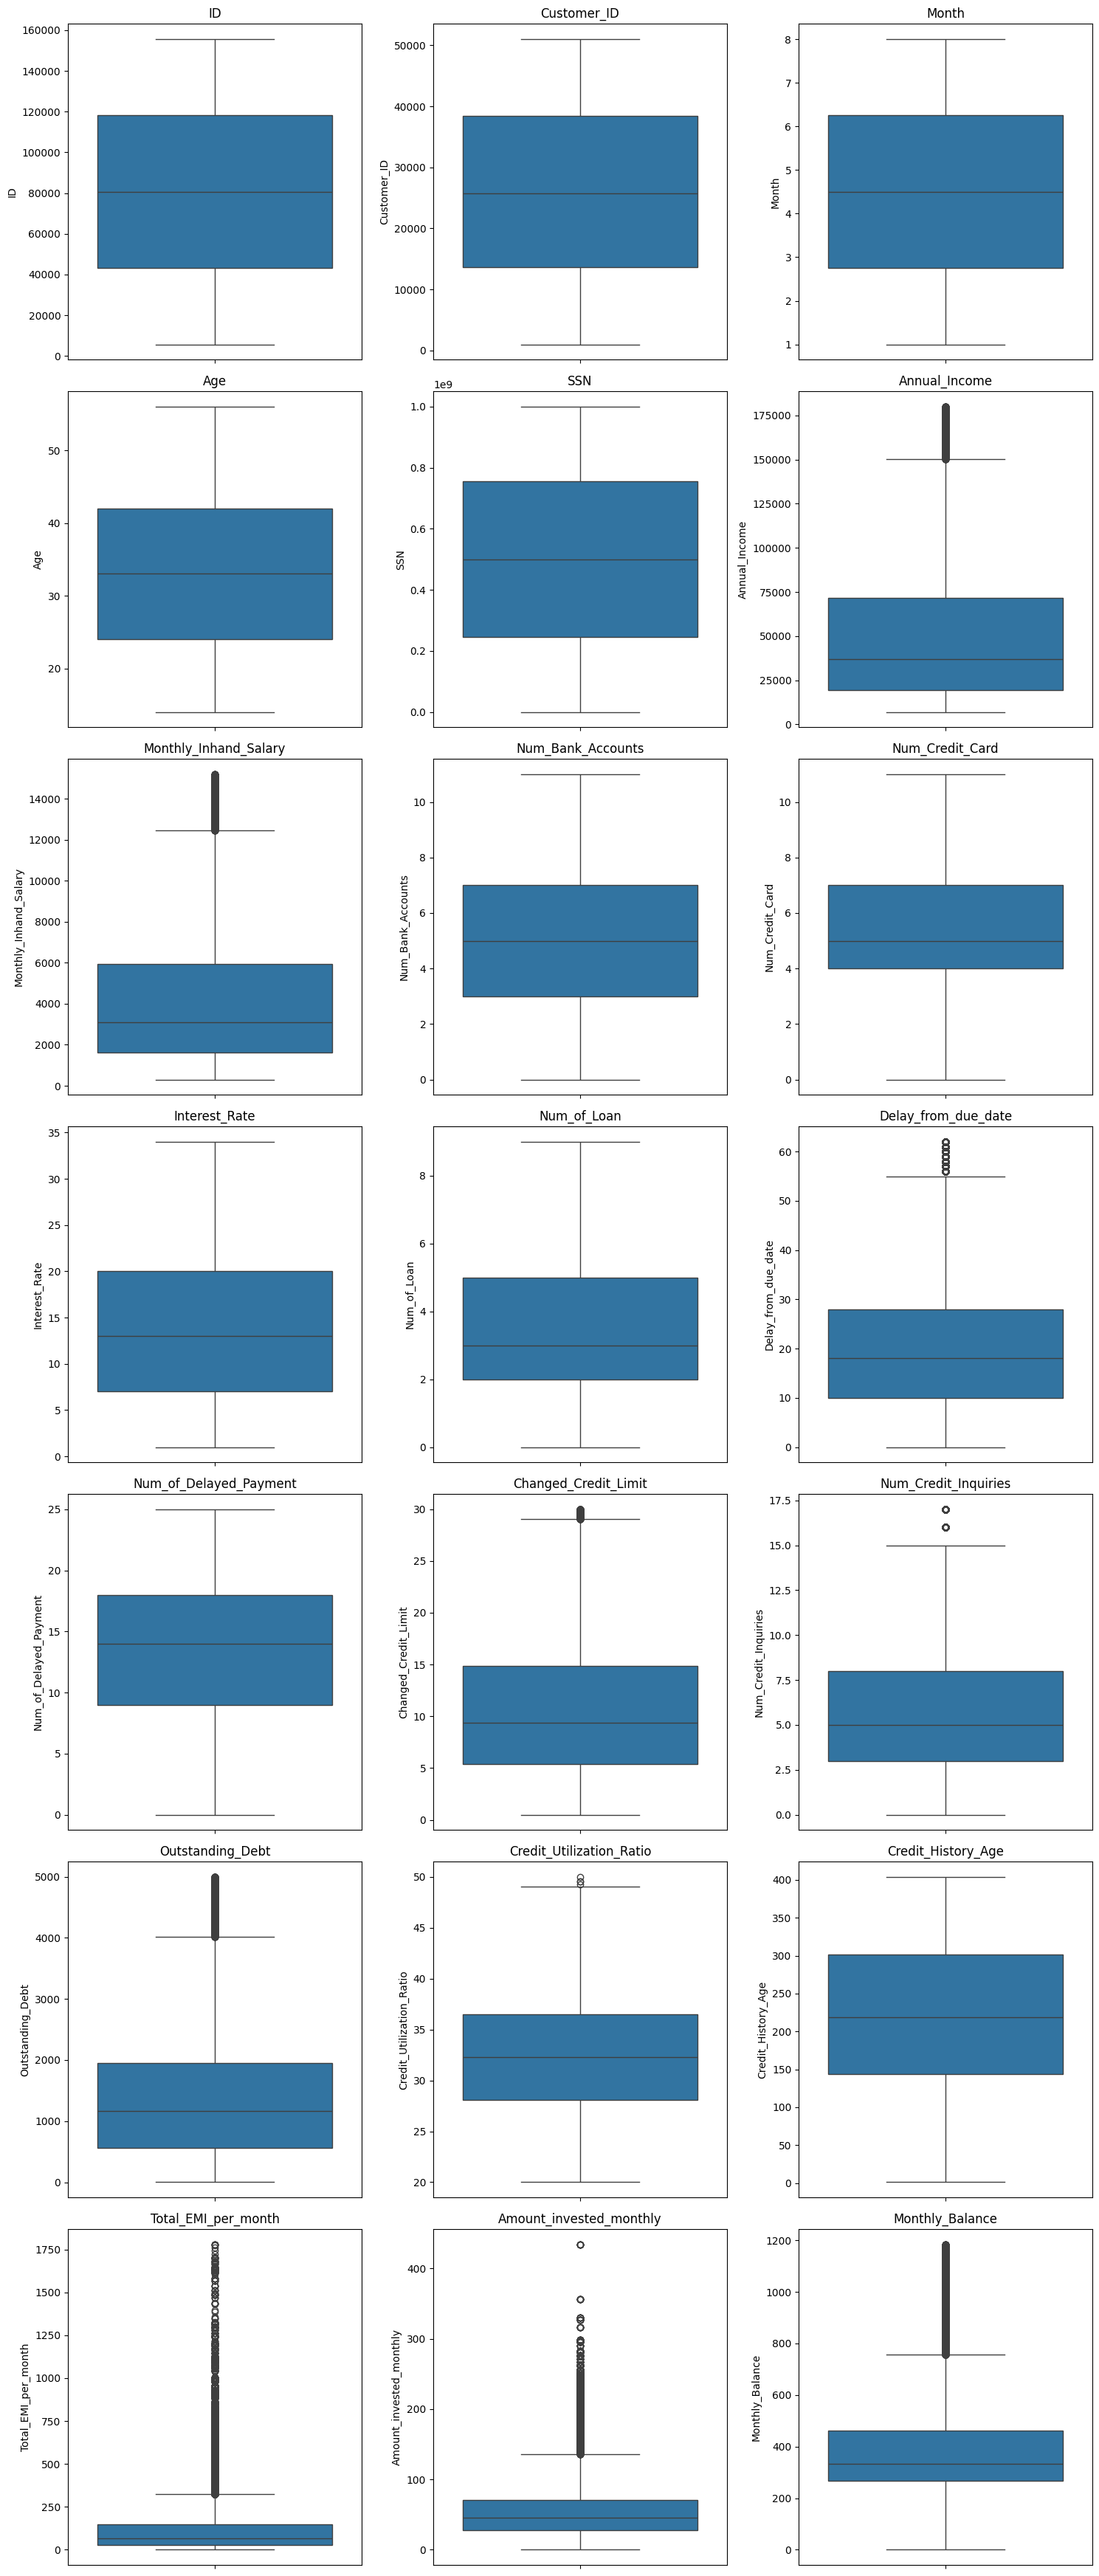

In [13]:
numerical_columns = clean_data.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for each numerical variable
num_plots = len(numerical_columns)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calculate number of rows needed
plt.figure(figsize=(15, num_rows * 5))  # Adjust figure size based on number of rows
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Adjust the number of columns to 3
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

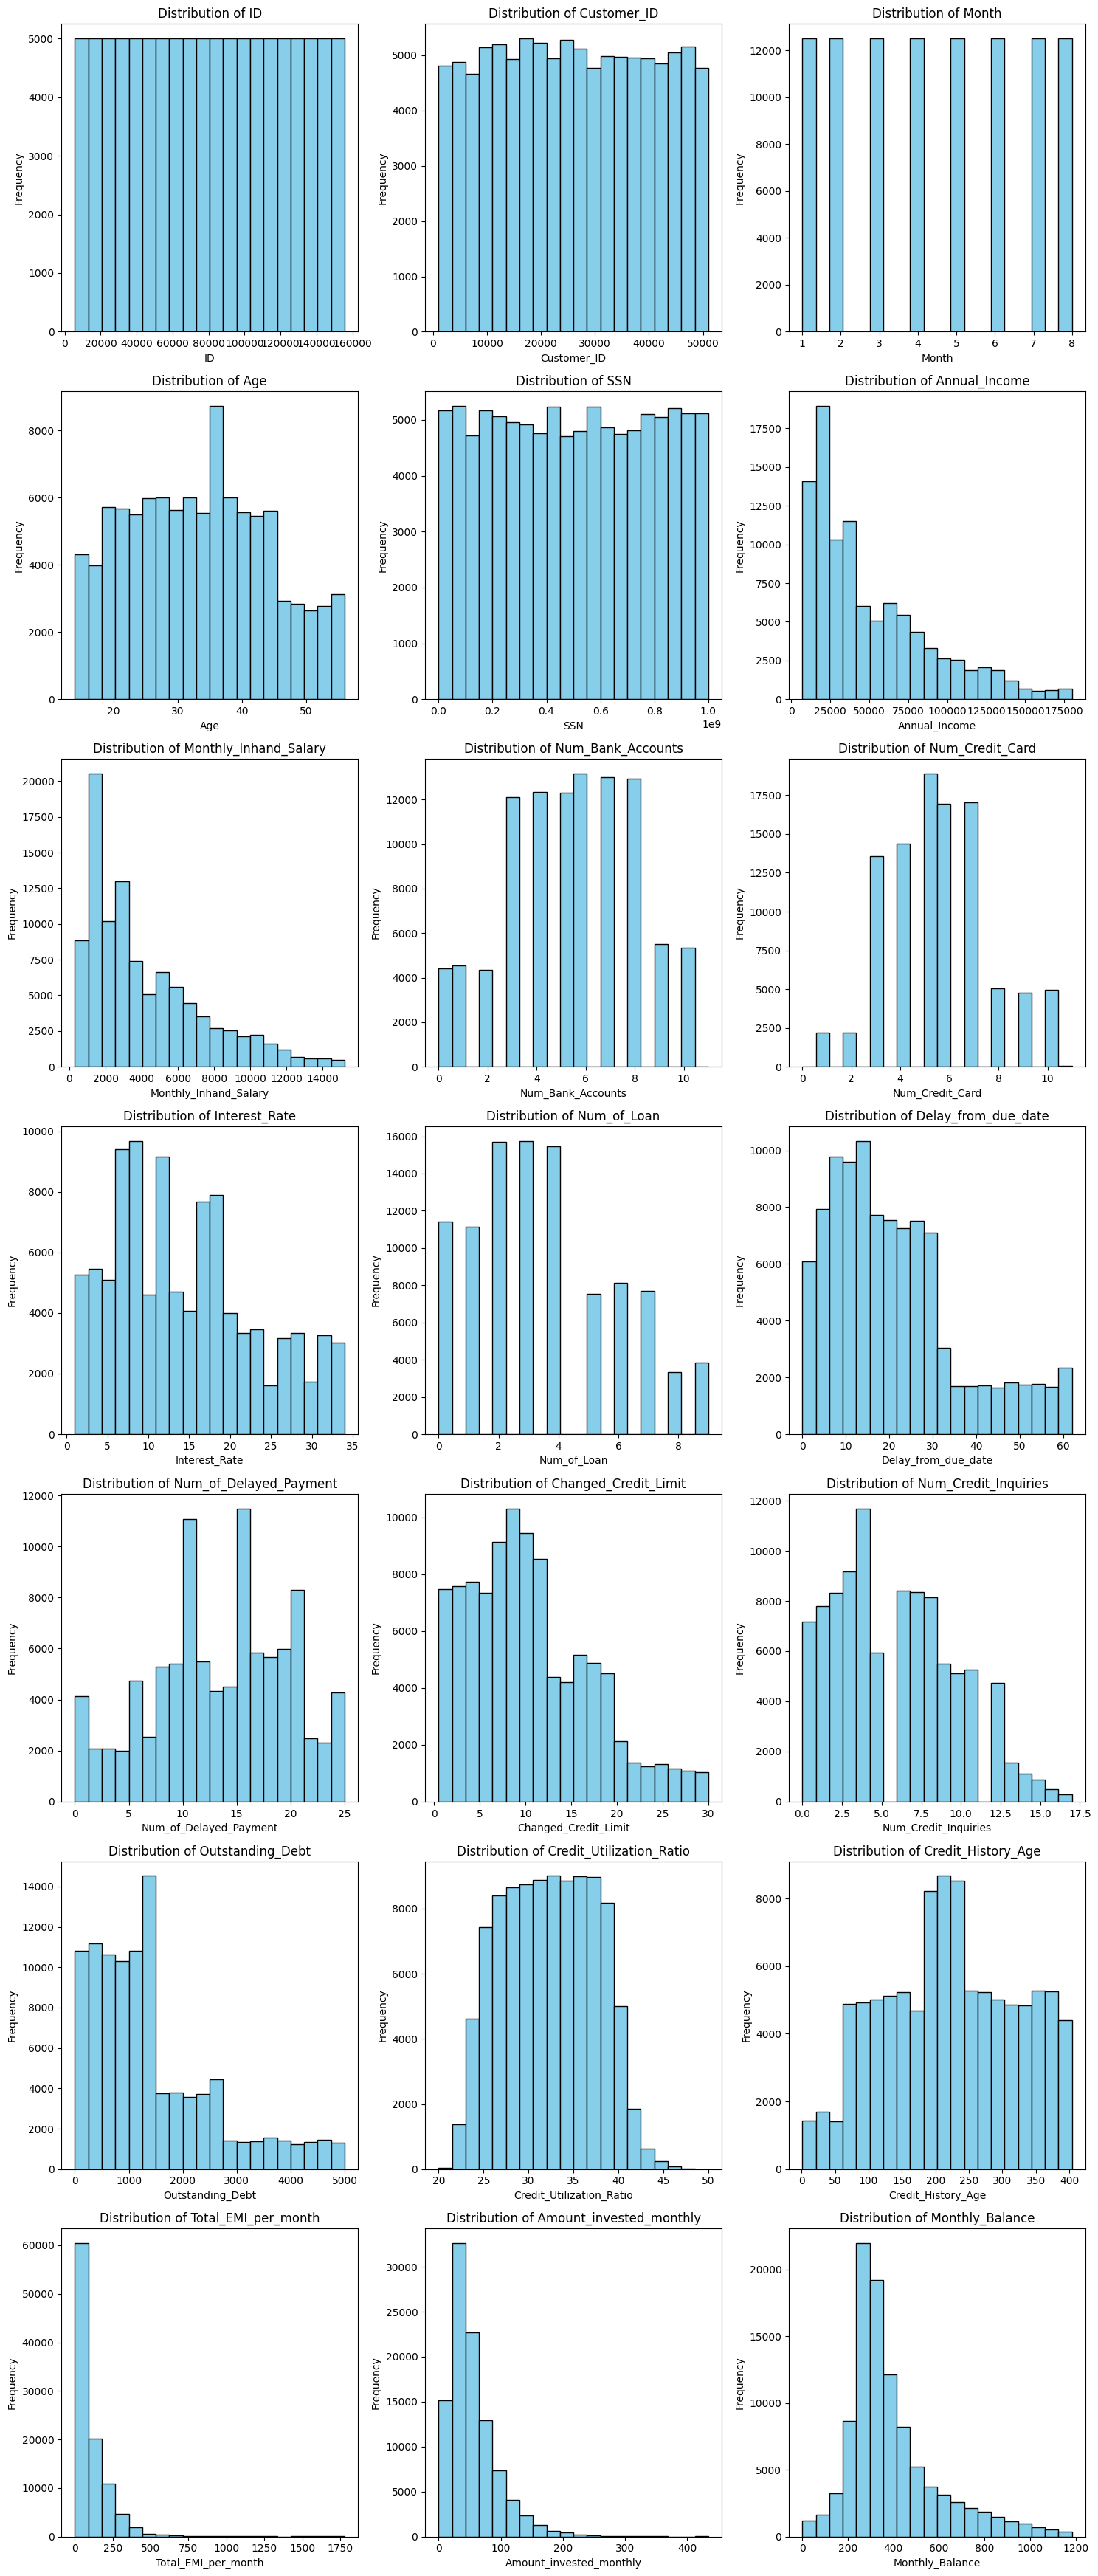

In [14]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns


num_cols = 3
num_rows = (len(numerical_columns) - 1) // num_cols + 1

# Plot histograms for each numerical variable
plt.figure(figsize=(15, num_rows * 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

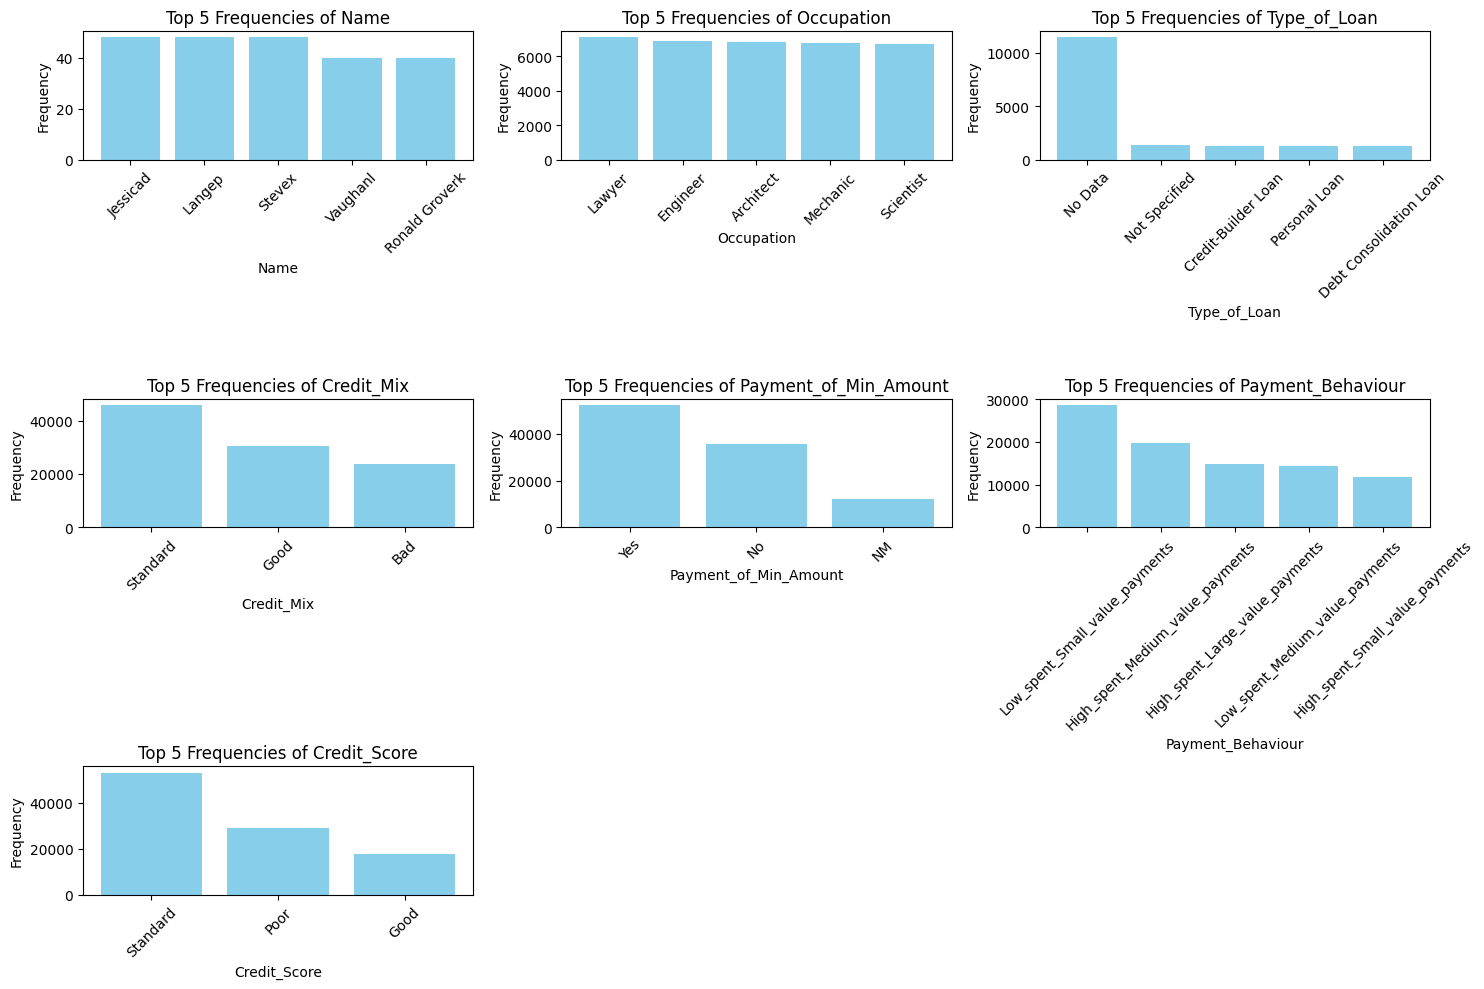

In [15]:
categorical_columns = data.select_dtypes(include=['object']).columns

top_n = 5

# Plot bar plots for the top N most frequent values of each categorical variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    value_counts = data[column].value_counts().head(top_n)
    plt.bar(value_counts.index, value_counts.values, color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Frequencies of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
clean_data['Credit_Score_Encoded'] = label_encoder.fit_transform(clean_data['Credit_Score'])

# Display the encoded values
print(clean_data[['Credit_Score', 'Credit_Score_Encoded']].head())
data = clean_data

  Credit_Score  Credit_Score_Encoded
0         Good                     0
1         Good                     0
2         Good                     0
3         Good                     0
4         Good                     0


Splitting and Training the Data

In [17]:
from sklearn.preprocessing import StandardScaler

# Define the columns to be scaled
columns_to_scale = ['Annual_Income', 'Outstanding_Debt', 'Age']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the selected columns
data_scaled = data.copy()  # Create a copy of the original dataframe
data_scaled[columns_to_scale] = scaler.fit_transform(data_scaled[columns_to_scale])

# Display the scaled dataframe
print(data_scaled.head())


     ID  Customer_ID  Month           Name       Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh -0.967163  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh -0.967163  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh -0.967163  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh -0.967163  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh -0.967163  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      -0.776959            1824.843333                3.0  ...   
1      -0.776959            1824.843333                3.0  ...   
2      -0.776959            1824.843333                3.0  ...   
3      -0.776959            1824.843333                3.0  ...   
4      -0.776959            1824.843333                3.0  ...   

   Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0         -0.482565                 26.822620  

In [18]:
import pandas as pd

# Load the dataset
data = data_scaled

# Perform feature engineering
# Example 1: Create a new feature 'Total_Num_Credit_Products' by adding 'Num_Bank_Accounts' and 'Num_Credit_Card'
data['Total_Num_Credit_Products'] = data['Num_Bank_Accounts'] + data['Num_Credit_Card']

# Example 2: Create a new feature 'Credit_Utilization_Ratio_Percentage' by converting 'Credit_Utilization_Ratio' to percentage
data['Credit_Utilization_Ratio_Percentage'] = data['Credit_Utilization_Ratio'] * 100

# Example 3: Create binary indicator variables based on specific conditions
data['High_Annual_Income'] = (data['Annual_Income'] > data['Annual_Income'].quantile(0.75)).astype(int)
data['Late_Payments'] = (data['Num_of_Delayed_Payment'] > 0).astype(int)

# Drop original columns used for feature engineering if needed

print(data.head())


     ID  Customer_ID  Month           Name       Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh -0.967163  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh -0.967163  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh -0.967163  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh -0.967163  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh -0.967163  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      -0.776959            1824.843333                3.0  ...   
1      -0.776959            1824.843333                3.0  ...   
2      -0.776959            1824.843333                3.0  ...   
3      -0.776959            1824.843333                3.0  ...   
4      -0.776959            1824.843333                3.0  ...   

   Total_EMI_per_month  Amount_invested_monthly  \
0            49.574949                 21.46538   
1            4

In [19]:
from sklearn.model_selection import train_test_split

selected_features = ['Age','Annual_Income', 'Num_of_Delayed_Payment', 'Total_Num_Credit_Products','Outstanding_Debt',]
X = data_scaled[selected_features]
y = data_scaled['Credit_Score_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have split your data into training and testing sets (X_train, X_test, y_train, y_test)

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.3299687611703511


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [22]:
selected_features = ['Age', 'Annual_Income', 'Num_of_Delayed_Payment', 'Total_Num_Credit_Products', 'Outstanding_Debt']
X = data_scaled[selected_features]
y = data_scaled['Credit_Score_Encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
 #Initialize and train Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
print("Random Forest Regressor Mean Squared Error:", rf_mse)


Random Forest Regressor Mean Squared Error: 0.3299687611703511


In [24]:
# Initialize and train Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
print("Gradient Boosting Regressor Mean Squared Error:", gb_mse)

Gradient Boosting Regressor Mean Squared Error: 0.48881158159515176


In [26]:
# Initialize and train Ridge Regression model
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print("Ridge Regression Mean Squared Error:", ridge_mse)

Ridge Regression Mean Squared Error: 0.5472000063843613


In [28]:
# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_y_pred)
print("Linear Regression Mean Squared Error:", lr_mse)


Linear Regression Mean Squared Error: 0.5472000408957807


In [29]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define selected features and target
selected_features = ['Age', 'Annual_Income', 'Num_of_Delayed_Payment', 'Total_Num_Credit_Products', 'Outstanding_Debt']
X = data_scaled[selected_features]
y = data_scaled['Credit_Score_Encoded']

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Ridge Regression': Ridge(random_state=42)
}

# Evaluate models using cross-validation
mse_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores[name] = -np.mean(scores)

# Find the best model based on mean squared error
best_model = min(mse_scores, key=mse_scores.get)
best_mse = mse_scores[best_model]

# Print MSE scores for all models
for name, mse in mse_scores.items():
    print(f"{name} Mean Squared Error: {mse}")

# Print the best model and its MSE
print(f"\nBest Model: {best_model} (Mean Squared Error: {best_mse})")

Linear Regression Mean Squared Error: 0.5467207181274648
Random Forest Regressor Mean Squared Error: 0.5519212330741569
Gradient Boosting Regressor Mean Squared Error: 0.4954658139859358
Ridge Regression Mean Squared Error: 0.5467207122698194

Best Model: Gradient Boosting Regressor (Mean Squared Error: 0.4954658139859358)
